                             Mean RI fraction       std    stderr
B1 (Thiamine) (mg)f                  1.818543  0.718806  0.293451
B2 (Riboflavin) (mg)f                1.308929  0.445134  0.181725
B3 (Niacin) (mg)f                    1.604460  0.667150  0.272363
B5 (Pantothenic Acid) (mg)f          1.319524  0.748390  0.305529
B6 (Pyridoxine) (mg)f                1.406101  0.609699  0.248909
B12 (Cobalamin) (µg)f                1.683333  3.831674  1.564274


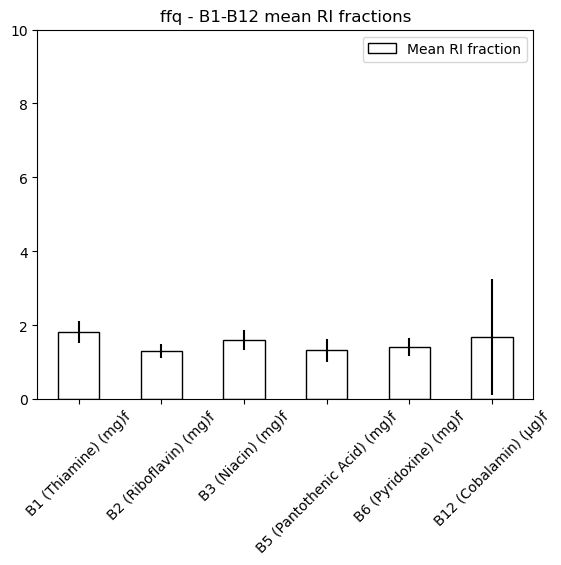

                             Mean RI fraction       std    stderr
B1 (Thiamine) (mg)f                  1.955711  1.869982  0.763417
B2 (Riboflavin) (mg)f                1.586538  1.879360  0.767245
B3 (Niacin) (mg)f                    1.641433  1.176202  0.480183
B5 (Pantothenic Acid) (mg)f          1.432821  1.413547  0.577078
B6 (Pyridoxine) (mg)f                1.600962  1.915785  0.782116
B12 (Cobalamin) (µg)f                0.928846  0.958112  0.391148


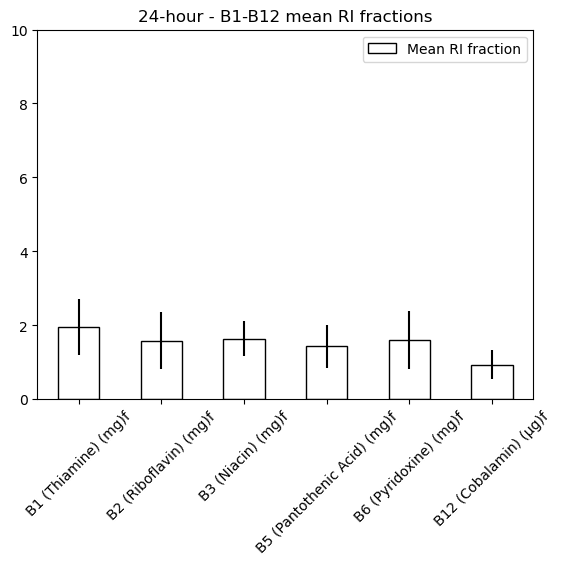

                             Mean RI fraction        std    stderr
B1 (Thiamine) (mg)f                  1.536908   0.522955  0.213495
B2 (Riboflavin) (mg)f                1.647436   3.016555  1.231504
B3 (Niacin) (mg)f                    1.441188   0.972077  0.396849
B5 (Pantothenic Acid) (mg)f          1.301538   1.351587  0.551783
B6 (Pyridoxine) (mg)f                1.229701   0.507501  0.207186
B12 (Cobalamin) (µg)f                5.317105  14.714335  6.007102


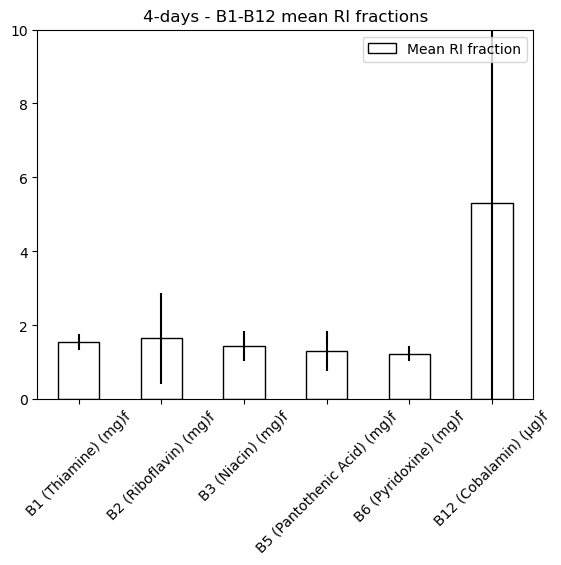

DAM methods
                     Nutrient                                  ffq  \
0          B1 (Thiamine) (mg)   female: 2/35=5.7%, male: 2/7=28.6%   
1        B2 (Riboflavin) (mg)                  Same RI: 9/42=21.4%   
2            B3 (Niacin) (mg)  female: 5/35=14.3%, male: 1/7=14.3%   
3  B5 (Pantothenic Acid) (mg)                 Same RI: 15/42=35.7%   
4        B6 (Pyridoxine) (mg)  female: 8/35=22.9%, male: 1/7=14.3%   
5        B12 (Cobalamin) (µg)                 Same RI: 21/42=50.0%   

                                24-hour                                4-days  
0     female: 3/33=9.1%, male: 0/6=0.0%    female: 3/33=9.1%, male: 3/6=50.0%  
1                  Same RI: 12/39=30.8%                  Same RI: 14/39=35.9%  
2   female: 12/33=36.4%, male: 0/6=0.0%  female: 11/33=33.3%, male: 1/6=16.7%  
3                  Same RI: 17/39=43.6%                  Same RI: 20/39=51.3%  
4  female: 16/33=48.5%, male: 1/6=16.7%  female: 15/33=45.5%, male: 1/6=16.7%  
5                

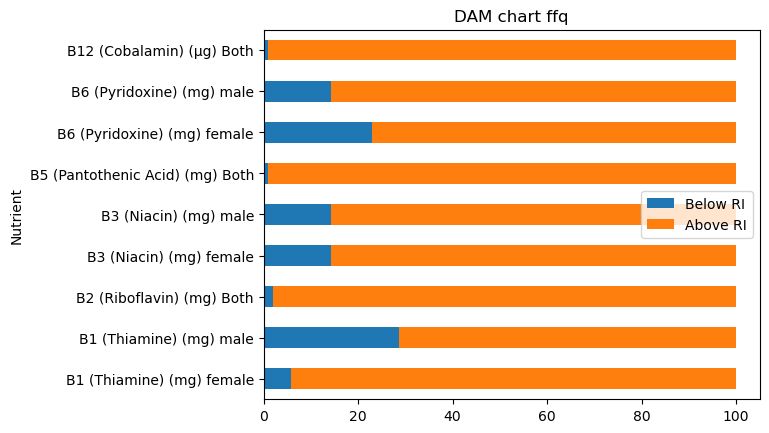

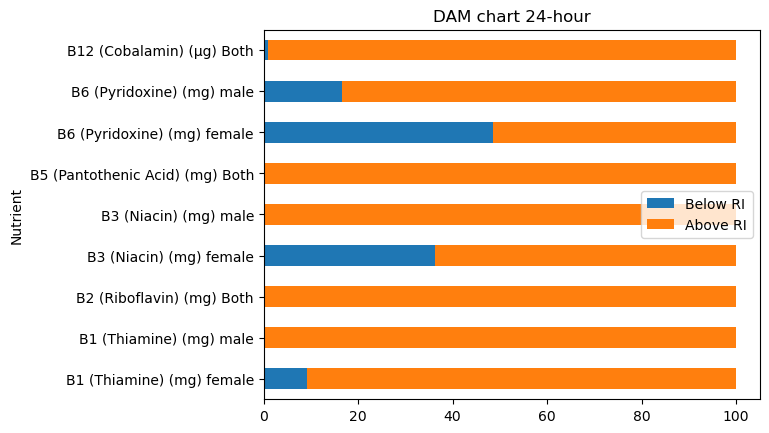

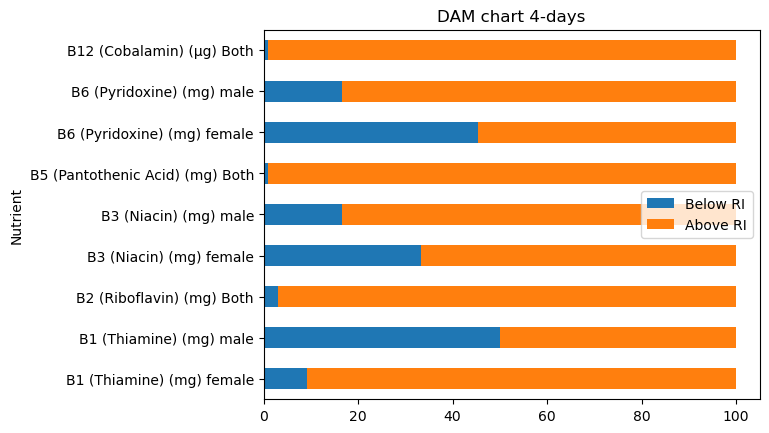

In [3]:
import pandas as pd
import os
from os import path
import numpy as np
import matplotlib.pyplot as plt
import math

def load_dict(dict_file,sep=';'):
    with open(dict_file,'r') as f:
        return dict([(values[0],[float(v) for v in values[1:]]) for values in [l.split(';') for l in f.readlines()]])

def mean_stderr_ref_plot(mean_stderr_df,ref,column_names, mean_std_stderr_columnnames, y_max, chart_title):
    mean,std,stderr = mean_std_stderr_columnnames
    ax = mean_stderr_df.plot(ylim=(0, y_max),kind='bar',y=mean, yerr=stderr, rot=45, fill=False, title=chart_title)
    width=0.5
    x=0
    for i,c in enumerate(column_names):
        rv = np.mean(ref[c])
        ax.hlines(rv, x - width/2, x + width/2, color='red')
        x += 1

def percentage_as_str(v1,v2):
    return f'{percentage(v1,v2):.1f}'

def percentage(v1,v2):
    return 100*float(v1)/float(v2)

def read_csv(fname,sep='\t'):
    return pd.read_csv(path.join(data_dir,fname),sep=sep)

TOTAL_ENERGY = 'Total energy'
def energy_calculation(input_df,columns):
    df = input_df.copy()
    energy_columns = [c.split()[0] for c in columns]
    energy_percentage_columns = [c+'p' for c in energy_columns]

    # calculate energy, total energy and energy percentage for each column in trial dataset and reference dataset and store in 'energy_columns'
    # energy
    for mc,ec in zip(columns,energy_columns):
        df[ec] = df[mc]*kcal_pr_g[mc]
    
    # total energy
    df[TOTAL_ENERGY] = df[energy_columns].sum(axis=1)

    # and energy percentage
    for ec,epc in zip(energy_columns,energy_percentage_columns):
        df[epc] = 100 * df[ec] / df[TOTAL_ENERGY]

    return df, [columns, energy_columns, energy_percentage_columns]

## main script starts here
try:
    data_dir = path.dirname(path.abspath(__file__))
except:
    # we are in jupyter env.
    from IPython.display import display, HTML
    display(HTML("<style>.container { width:100% !important; }</style>"))    
    data_dir = 'work'

STUDENT_NO_COLNAME='Stud_Nr'
GENDER_COLNAME='Sex'
STDDEV_COLNAME='std'
STDERR_COLNAME='stderr'
MEAN_COLNAME='mean'
MALE='male'
FEMALE='female'
BOTH='same RI'

df_ri = read_csv('ri.csv')
kcal_pr_g = load_dict(path.join(data_dir,"kcal_pr_g.csv"))

#macronutrient_columns = ['Alcohol (g)','Protein (g)','Carbs (g)','Fat (g)']
micronutrient_columns = ['B1 (Thiamine) (mg)','B2 (Riboflavin) (mg)','B3 (Niacin) (mg)','B5 (Pantothenic Acid) (mg)','B6 (Pyridoxine) (mg)','B12 (Cobalamin) (µg)']


student_subset = [str(i) for i in range(200)]
exclude = {
    'ffq': [],
    '4-days': [], #5,11,39,25],
    '24-hour': []
}

df_below_data = dict([(c,[]) for c in micronutrient_columns])
studies = ('ffq','24-hour','4-days')
df_dam_charts = []
for study in studies:
    below_above = []

    loaded_df = read_csv(f'{study}.csv')
    loaded_df[STUDENT_NO_COLNAME] = loaded_df[STUDENT_NO_COLNAME].astype(str)
    loaded_df[GENDER_COLNAME] = loaded_df[GENDER_COLNAME].map(lambda v: v.strip().lower())
    resulting_subset = [n for n in student_subset if not int(n) in exclude[study]]
    #loaded_df = loaded_df[loaded_df[STUDENT_NO_COLNAME].isin(resulting_subset)].reset_index(drop=True) # reindex is important !!
    
    for columns,calculate_energy,mean_legend in ((micronutrient_columns,False,'Mean RI fraction'),): #(macronutrient_columns,True)):
        df = pd.concat([loaded_df[GENDER_COLNAME], loaded_df[columns].replace(',', '.',regex=True).astype(float)],axis=1) # necessary as decimal separator in CSV files is a mixture of commas and dots

        # for each input column add a new fraction column
        fraction_columns = [c+'f' for c in columns]
        gender_below_dict = { FEMALE: [], MALE:[]}
        for column, fraction_column in zip(columns,fraction_columns):
            ri = df_ri[column]
            identical_ri = len(set(ri.values[:2])) == 1
            
            # lookup ri for each student
            df_student_ri = df.merge(df_ri, on=[GENDER_COLNAME], how = 'right')[column + '_y']
            df[fraction_column] = df[column] / df_student_ri
            df_frac_notna = df[df[fraction_column].notna()==True]
            if identical_ri:
                below_above.append([f'{column} Both',below,100-below])
                below = len(df_frac_notna[df_frac_notna[fraction_column]<1])
                total = len(df_frac_notna)
                p = percentage(below,total)
                df_below_data[column].append(f'Same RI: {below}/{total}={percentage_as_str(below,total)}%')
            else:
                res =[]
                for gender in (FEMALE, MALE):
                    below = len(df_frac_notna[(df_frac_notna[GENDER_COLNAME]==gender) & (df_frac_notna[fraction_column]<1)])
                    total = len(df_frac_notna[df_frac_notna[GENDER_COLNAME]==gender])
                    p = percentage(below,total)
                    below_above.append([f'{column} {gender}',p,100-p])
                    res.append(f'{gender}: {below}/{total}={percentage_as_str(below,total)}%')
                df_below_data[column].append(', '.join(res))
        df_dam_charts.append((f'DAM chart {study}', pd.DataFrame(columns = ['Nutrient','Below RI','Above RI'], data = below_above)))


        # calculate mean, STDDEV_COLNAME and stderr
        mean_std_df = df[fraction_columns].describe().loc[[MEAN_COLNAME,STDDEV_COLNAME]].T
        mean_std_df = mean_std_df.rename(columns={MEAN_COLNAME: mean_legend})
        mean_std_df[STDERR_COLNAME] = mean_std_df[STDDEV_COLNAME] / math.sqrt(len(mean_std_df))

        print(mean_std_df)
        ax = mean_std_df.plot(ylim = (0,10), kind ='bar', y=mean_legend, yerr=STDERR_COLNAME, rot=45, fill=False, title=f'{study} - B1-B12 mean RI fractions')
        plt.show()

# below RI dataframe
data = [[c] + df_below_data[c] for c in columns]
df_below_ri = pd.DataFrame(columns = ['Nutrient'] + list(studies), data = data)
print('DAM methods')
print(df_below_ri)

print('DAM charts')
for t,df in df_dam_charts:
    ax = df.plot(x = 'Nutrient', y=['Below RI','Above RI'], stacked=True, ylim = (0,100), kind ='barh', title=t)
    plt.show()
